<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [103]:
dataset = load_breast_cancer()

In [104]:
X,Y = dataset.data, dataset.target

In [105]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size = 0.2)

In [107]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32).reshape(-1,1))
Y_test = torch.from_numpy(Y_test.astype(np.float32).reshape(-1,1))

In [108]:
class Model(nn.Module):
  def __init__(self,dim = 2,output = 1):
    super(Model,self).__init__()
    self.res = nn.Sequential(
        nn.Linear(dim,output),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.res(x)

In [109]:
X_train.shape

torch.Size([455, 30])

In [110]:
loss_fn = nn.BCELoss()
model = Model(dim=X_train.shape[1])
optim = torch.optim.Adam(model.parameters(),lr = 0.01)
batch_size = 32

In [111]:
train_losses = []
test_losses = []
for i in range(17):
  optim.zero_grad()
  output = model(X_train)
  loss = loss_fn(output,Y_train)
  loss.backward()
  optim.step()

  outputs_test = model(X_test)
  loss_test = loss_fn(outputs_test,Y_test)

  train_losses.append(loss.item())
  test_losses.append(loss_test.item())

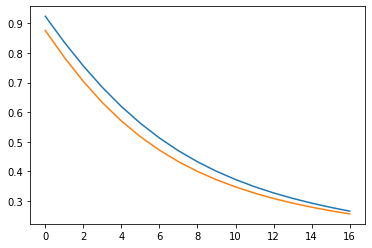

In [112]:
plt.plot(range(len(train_losses)),train_losses)
plt.plot(range(len(test_losses)),test_losses)
plt.show()

In [113]:
with torch.no_grad():
  predict = model(X_test)
  predict = np.round(predict.numpy())
  test_acc = np.mean(Y_test.numpy() == predict)
print(test_acc)

0.9210526315789473


In [114]:
model.state_dict()

OrderedDict([('res.0.weight',
              tensor([[-0.0032, -0.1802, -0.0142, -0.0346, -0.0005, -0.1986, -0.1399, -0.2044,
                       -0.0914, -0.0375, -0.0795,  0.0489, -0.1890, -0.2597,  0.0805, -0.1243,
                        0.0097, -0.0476,  0.0079,  0.0655, -0.3279, -0.1256, -0.0566, -0.3341,
                       -0.1814, -0.0920, -0.0665, -0.0272, -0.1651, -0.0258]])),
             ('res.0.bias', tensor([0.0432]))])

In [117]:
torch.save(model.state_dict(),'my_model.pt')

In [118]:
!ls

my_model.pt  sample_data


In [119]:
model2 = Model(dim=X_train.shape[1])

In [120]:
model2.load_state_dict(torch.load('my_model.pt'))

<All keys matched successfully>